<a href="https://colab.research.google.com/github/enigmatized/LookingForAlphaWithPythonNotebooks/blob/main/GetOnandaOrderBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile welcome.cpp

#include <iostream>
int main()
{
    std::cout << "Welcome To AI with Ashok's Blog\n";
    return 0;
}

Writing welcome.cpp


In [ ]:
%%bash

g++ for_google_colab_to_scrape_oanda_orderBook.cpp -lcurl ;
./a.out;

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
%%bash



terminate called after throwing an instance of 'nlohmann::json_abi_v3_11_2::detail::parse_error'
  what():  [json.exception.parse_error.101] parse error at line 1, column 1: syntax error while parsing value - unexpected end of input; expected '[', '{', or a literal
bash: line 2:  1900 Aborted                 (core dumped) ./a.out


CalledProcessError: ignored

In [ ]:
%%bash 

g++ main.cpp -o main 
./main

/usr/bin/ld: /tmp/ccN7Qkzr.o: in function `main':
main.cpp:(.text+0x526): undefined reference to `curl_easy_init'
/usr/bin/ld: main.cpp:(.text+0x56a): undefined reference to `curl_slist_append'
/usr/bin/ld: main.cpp:(.text+0x595): undefined reference to `curl_slist_append'
/usr/bin/ld: main.cpp:(.text+0x5bc): undefined reference to `curl_easy_setopt'
/usr/bin/ld: main.cpp:(.text+0x5dc): undefined reference to `curl_easy_setopt'
/usr/bin/ld: main.cpp:(.text+0x5fc): undefined reference to `curl_easy_setopt'
/usr/bin/ld: main.cpp:(.text+0x61c): undefined reference to `curl_easy_setopt'
/usr/bin/ld: main.cpp:(.text+0x63e): undefined reference to `curl_easy_perform'
/usr/bin/ld: main.cpp:(.text+0x7ce): undefined reference to `curl_easy_strerror'
/usr/bin/ld: main.cpp:(.text+0x7fd): undefined reference to `curl_easy_cleanup'
collect2: error: ld returned 1 exit status
bash: line 3: ./main: No such file or directory


CalledProcessError: ignored

In [ ]:
import os
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.oauth2.service_account import Credentials

# Set up Google Drive API credentials
credentials = Credentials.from_service_account_file('path/to/credentials.json')
drive_service = build('drive', 'v3', credentials=credentials)

def save_to_drive(file_path, folder_id=None):
    file_name = os.path.basename(file_path)
    media = MediaFileUpload(file_path)

    file_metadata = {'name': file_name}
    if folder_id:
        file_metadata['parents'] = [folder_id]

    request = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    )
    response = request.execute()

    print(f"File '{file_name}' saved to Google Drive with ID: {response['id']}")


# Usage example
file_path = 'output_first_attempt_do_throw_away.json'
#folder_id = 'your_folder_id'  # If you want to save it in a specific folder, provide its ID

save_to_drive(file_path) #, folder_id)

In [3]:

from collections import defaultdict
import requests
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime, timedelta, time

In [4]:
with open('output_first_attempt_do_throw_away.json', 'r') as openfile:
        # Reading from json file
        json_data = json.load(openfile)



In [8]:
len(json_data)

200

In [10]:
type(json_data)

list

In [15]:
json_data[0]['orderBook'].keys()

dict_keys(['bucketWidth', 'buckets', 'instrument', 'price', 'time', 'unixTime'])

In [27]:
#dict_keys(['bucketWidth', 'buckets', 'instrument', 'price', 'time', 'unixTime'])
json_data[0]['orderBook']['buckets']


totalLongBelowPrice = 0
totalShort = 0
totalLong = 0
for x in json_data[0]['orderBook']['buckets']:
  totalLong += float(x['longCountPercent'])
  totalShort += float(x['shortCountPercent'])
  if float(x['price']) < float(json_data[0]['orderBook']['price']):
    totalLongBelowPrice +=  float(x['longCountPercent'])


print(totalLongBelowPrice, totalShort, totalLong)

51.77839999999984 35.35770000000076 64.63620000000027


In [30]:
json_data[100]['orderBook']['price']

'138.502'

print are keys the sames False
{'138.745': 138.745, '138.861': 138.861, '138.452': 138.452, '138.416': 138.416, '138.502': 138.502, '138.330': 138.33, '138.602': 138.602}
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 12]
How many places will we see on our Heatmap 19


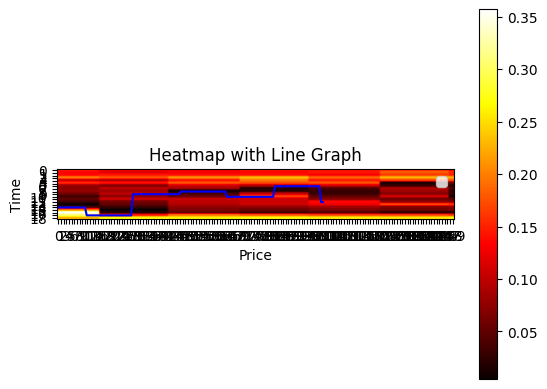

In [74]:
d = defaultdict(list)


price_arr = []
d_price = {}

size_ = 150
for i in range(0, size_):
  price_arr.append(float(json_data[i]['orderBook']['price']))
  d_price[json_data[i]['orderBook']['price']  ] = float(json_data[i]['orderBook']['price'])
  
  for x in json_data[i]['orderBook']['buckets']: 
    d[x['price']].append( float(x['longCountPercent']) )
    #print(float(x['longCountPercent']))
    

ls = list(d.keys())

print("print are keys the sames", list(d.keys() ) == list(d_price.keys()))
# print(ls)

print(d_price)

ls_ = [(x, float(x)) for x in ls if float(x) > 138  and float(x) < 139]


#I think we need to make the prices match the index of where they are getting put into the 2x2 matrix?
def closest_values(list_of_prices_y_axis, list_of_our_actual_prices, size_):
  result = []
  for v in list_of_our_actual_prices[:size_]:
    for i, (string_values, _) in enumerate(list_of_prices_y_axis):
      #print("float")
      if float(string_values) > v: result.append(i); break; print("Should get here 19 times?")
  return result



tryThis_arr = closest_values(ls_, price_arr, size_)

print(tryThis_arr)
print("How many places will we see on our Heatmap", len(ls_))

final_price_arr = []
final = []
for i in range(0, 1): 
  for string_price, float_price in ls_: 
    final.append( d[string_price] )
    if    string_price in list(d_price.keys()) : final_price_arr.append( d_price[float_price])
    else: 
      final_price_arr.append( 1.8)
      #print('How many times are we doing this though?')

    # print(type(string_price))
    # print(      type(list(d_price.keys())[0])   )
    # 





float_list = [[float(value) for value in sublist] for sublist in final if size_ == len(sublist) ]
# for i, x in enumerate(float_list):
#   print(i, x)


numpy_array = np.array(float_list)

numpy_array_line_datae = np.array([100 for _ in  float_list])

import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
heatmap_data = numpy_array


# Generate random data for the line graph
  #So What I think needs to happen here
  #Is that I have to scale the chart
  #So I know where the price is, in respect to the spot that is in the matrix
  #Then I have to scale the line data to match the representation on the chage.
  #Which I do not think will be bad? I think

  #I think this is represented as a 2-d matrix
  #So (0,0 is the top left) and (200,200 is bottom right, I beleive)
  #So my line graph need to just be the x-axis, (1 through 100)
  #My y axis needs to match the state and end

x = np.linspace(0, 100, 150)
y =  np.sin(x)
y = np.array(final_price_arr)
y = np.array(tryThis_arr)

#I





# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(heatmap_data, cmap='hot')

# Create the line graph
line = ax.plot(x, y, color='blue' )#, label='Line Graph')



# Customize the plot
ax.set_xticks(np.arange(0, 150))
ax.set_yticks(np.arange(0, len(ls_)))
# ax.set_xticklabels(np.arange(0, 100,1 ))
# ax.set_yticklabels(np.arange(0,len(ls_), 1))

ax.set_xlabel('Price')
ax.set_ylabel('Time')
ax.set_title('Heatmap with Line Graph')
ax.legend()

# Add colorbar for the heatmap
cbar = fig.colorbar(heatmap)

# Display the plot
plt.show()


print are keys the sames False
{'138.745': 138.745, '138.861': 138.861, '138.452': 138.452, '138.416': 138.416, '138.502': 138.502, '138.330': 138.33, '138.602': 138.602}
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 12]
How many places will we see on our Heatmap 19


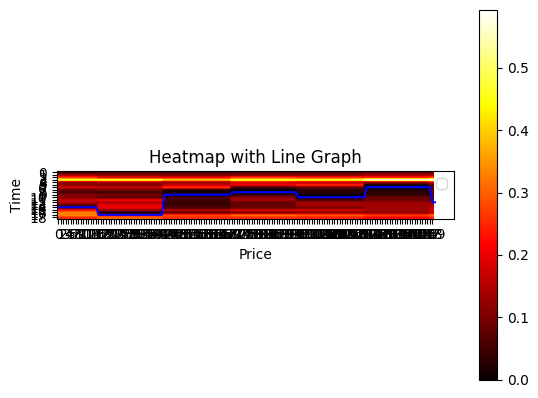

In [77]:
d = defaultdict(list)


price_arr = []
d_price = {}

size_ = 150
for i in range(0, size_):
  price_arr.append(float(json_data[i]['orderBook']['price']))
  d_price[json_data[i]['orderBook']['price']  ] = float(json_data[i]['orderBook']['price'])
  
  for x in json_data[i]['orderBook']['buckets']: 
    d[x['price']].append( float(x['shortCountPercent']) )
    #print(float(x['longCountPercent']))
    

ls = list(d.keys())

print("print are keys the sames", list(d.keys() ) == list(d_price.keys()))
# print(ls)

print(d_price)

ls_ = [(x, float(x)) for x in ls if float(x) > 138  and float(x) < 139]


#I think we need to make the prices match the index of where they are getting put into the 2x2 matrix?
def closest_values(list_of_prices_y_axis, list_of_our_actual_prices, size_):
  result = []
  for v in list_of_our_actual_prices[:size_]:
    for i, (string_values, _) in enumerate(list_of_prices_y_axis):
      #print("float")
      if float(string_values) > v: result.append(i); break; print("Should get here 19 times?")
  return result



tryThis_arr = closest_values(ls_, price_arr, size_)

print(tryThis_arr)
print("How many places will we see on our Heatmap", len(ls_))

final_price_arr = []
final = []
for i in range(0, 1): 
  for string_price, float_price in ls_: 
    final.append( d[string_price] )
    if    string_price in list(d_price.keys()) : final_price_arr.append( d_price[float_price])
    else: 
      final_price_arr.append( 1.8)
      #print('How many times are we doing this though?')

    # print(type(string_price))
    # print(      type(list(d_price.keys())[0])   )
    # 





float_list = [[float(value) for value in sublist] for sublist in final if size_ == len(sublist) ]
# for i, x in enumerate(float_list):
#   print(i, x)


numpy_array = np.array(float_list)

numpy_array_line_datae = np.array([100 for _ in  float_list])

import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
heatmap_data = numpy_array


# Generate random data for the line graph
  #So What I think needs to happen here
  #Is that I have to scale the chart
  #So I know where the price is, in respect to the spot that is in the matrix
  #Then I have to scale the line data to match the representation on the chage.
  #Which I do not think will be bad? I think

  #I think this is represented as a 2-d matrix
  #So (0,0 is the top left) and (200,200 is bottom right, I beleive)
  #So my line graph need to just be the x-axis, (1 through 100)
  #My y axis needs to match the state and end

x = np.linspace(0, 150, 150)
y =  np.sin(x)
y = np.array(final_price_arr)
y = np.array(tryThis_arr)

#I





# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(heatmap_data, cmap='hot')

# Create the line graph
line = ax.plot(x, y, color='blue' )#, label='Line Graph')



# Customize the plot
ax.set_xticks(np.arange(0, 150))
ax.set_yticks(np.arange(0, len(ls_)))
# ax.set_xticklabels(np.arange(0, 100,1 ))
# ax.set_yticklabels(np.arange(0,len(ls_), 1))

ax.set_xlabel('Price')
ax.set_ylabel('Time')
ax.set_title('Heatmap with Line Graph')
ax.legend()

# Add colorbar for the heatmap
cbar = fig.colorbar(heatmap)

# Display the plot
plt.show()


print are keys the sames False
{'138.745': 138.745, '138.861': 138.861, '138.452': 138.452, '138.416': 138.416, '138.502': 138.502, '138.330': 138.33, '138.602': 138.602}
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 7, 7]
How many places will we see on our Heatmap, y axis 23


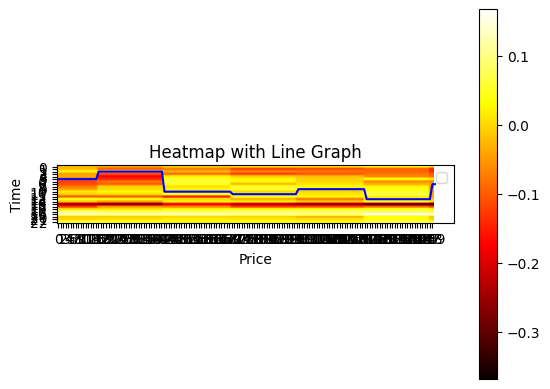

In [84]:
d = defaultdict(list)


price_arr = []
d_price = {}

size_ = 150
for i in range(0, size_):
  price_arr.append(float(json_data[i]['orderBook']['price']))
  d_price[json_data[i]['orderBook']['price']  ] = float(json_data[i]['orderBook']['price'])
  
  for x in json_data[i]['orderBook']['buckets']:
    
    d[x['price']].append(float(x['longCountPercent']) - float(x['shortCountPercent']) )
    #print(float(x['longCountPercent']))
    

ls = list(d.keys())

print("print are keys the sames", list(d.keys() ) == list(d_price.keys()))
# print(ls)

print(d_price)

ls_ = [(x, float(x)) for x in ls if float(x) > 137.8  and float(x) < 139]


#I think we need to make the prices match the index of where they are getting put into the 2x2 matrix?
def closest_values(list_of_prices_y_axis, list_of_our_actual_prices, size_):
  result = []
  for v in list_of_our_actual_prices[:size_]:
    for i, (string_values, _) in enumerate(list_of_prices_y_axis):
      #print("float")
      if float(string_values) < v: result.append(i); break; print("Should get here 19 times?")
  return result



tryThis_arr = closest_values(ls_[::-1], price_arr, size_)

print(tryThis_arr)
print("How many places will we see on our Heatmap, y axis", len(ls_))

final_price_arr = []
final = []
for i in range(0, 1): 
  for string_price, float_price in ls_: 
    final.append( d[string_price] )
    if    string_price in list(d_price.keys()) : final_price_arr.append( d_price[float_price])
    else: 
      final_price_arr.append( 1.8)
      #print('How many times are we doing this though?')

    # print(type(string_price))
    # print(      type(list(d_price.keys())[0])   )
    # 





float_list = [[float(value) for value in sublist] for sublist in final if size_ == len(sublist) ]
# for i, x in enumerate(float_list):
#   print(i, x)
float_list = float_list[::-1]


numpy_array = np.array(float_list)

numpy_array_line_datae = np.array([100 for _ in  float_list])

import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
heatmap_data = numpy_array


# Generate random data for the line graph
  #So What I think needs to happen here
  #Is that I have to scale the chart
  #So I know where the price is, in respect to the spot that is in the matrix
  #Then I have to scale the line data to match the representation on the chage.
  #Which I do not think will be bad? I think

  #I think this is represented as a 2-d matrix
  #So (0,0 is the top left) and (200,200 is bottom right, I beleive)
  #So my line graph need to just be the x-axis, (1 through 100)
  #My y axis needs to match the state and end

x = np.linspace(0, 150, 150)
y =  np.sin(x)
y = np.array(final_price_arr)
y = np.array(tryThis_arr)

#I





# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(heatmap_data, cmap='hot')

# Create the line graph
line = ax.plot(x, y, color='blue' )#, label='Line Graph')



# Customize the plot
ax.set_xticks(np.arange(0, 150))
ax.set_yticks(np.arange(0, len(ls_)))
# ax.set_xticklabels(np.arange(0, 100,1 ))
# ax.set_yticklabels(np.arange(0,len(ls_), 1))

ax.set_xlabel('Price')
ax.set_ylabel('Time')
ax.set_title('Heatmap with Line Graph')
ax.legend()

# Add colorbar for the heatmap
cbar = fig.colorbar(heatmap)

# Display the plot
plt.show()


In [80]:
heatmap_data

array([[ 0.0695,  0.0695,  0.0695, ...,  0.0747,  0.0514,  0.0514],
       [ 0.    ,  0.    ,  0.    , ...,  0.0327, -0.0047, -0.0047],
       [-0.0092, -0.0092, -0.0092, ...,  0.0281, -0.0187, -0.0187],
       ...,
       [ 0.0279,  0.0279,  0.0279, ..., -0.0934, -0.1401, -0.1401],
       [-0.0232, -0.0232, -0.0232, ..., -0.0934, -0.1448, -0.1448],
       [-0.0232, -0.0232, -0.0232, ...,  0.042 ,  0.0187,  0.0187]])

In [42]:
np.shape(y)
price_arr

[138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.745,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.861,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.452,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.416,
 138.502,
 138.502,
 138.502,
 138.502,
 138.502]

[ 0.          0.10083842  0.20064886  0.2984138   0.39313661  0.48385164
  0.56963411  0.64960951  0.72296256  0.78894546  0.84688556  0.8961922
  0.93636273  0.96698762  0.98775469  0.99845223  0.99897117  0.98930624
  0.96955595  0.93992165  0.90070545  0.85230712  0.79522006  0.73002623
  0.65739025  0.57805259  0.49282204  0.40256749  0.30820902  0.21070855
  0.11106004  0.01027934 -0.09060615 -0.19056796 -0.28858706 -0.38366419
 -0.47483011 -0.56115544 -0.64176014 -0.7158225  -0.7825875  -0.84137452
 -0.89158426 -0.93270486 -0.96431712 -0.98609877 -0.99782778 -0.99938456
 -0.99075324 -0.97202182 -0.94338126 -0.90512352 -0.85763861 -0.80141062
 -0.73701276 -0.66510151 -0.58640998 -0.50174037 -0.41195583 -0.31797166
 -0.22074597 -0.12126992 -0.0205576   0.0803643   0.18046693  0.27872982
  0.37415123  0.46575841  0.55261747  0.63384295  0.7086068   0.77614685
  0.83577457  0.8868821   0.92894843  0.96154471  0.98433866  0.99709789
  0.99969234  0.99209556  0.97438499  0.94674118  0.

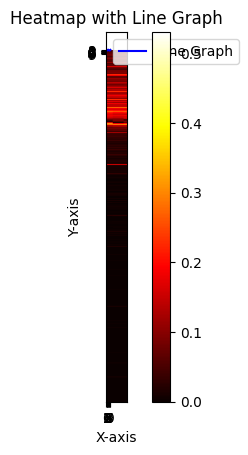

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
heatmap_data = numpy_array

# Generate random data for the line graph
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(heatmap_data, cmap='hot')

# Create the line graph
line = ax.plot(x, y, color='blue', label='Line Graph')

# Customize the plot
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(0, 10, 1))
ax.set_yticklabels(np.arange(0, 10, 1))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Heatmap with Line Graph')
ax.legend()

# Add colorbar for the heatmap
cbar = fig.colorbar(heatmap)

# Display the plot
plt.show()

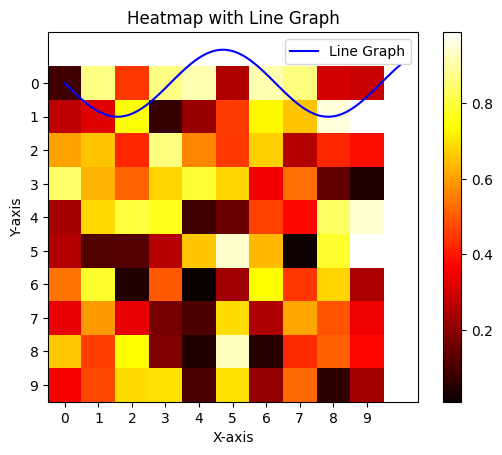

In [28]:

#WORKING EXAMPLE DO NOT CHANGE THIS CODE AT ALL

import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
heatmap_data = np.random.rand(10, 10)

# Generate random data for the line graph
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
heatmap = ax.imshow(heatmap_data, cmap='hot')

# Create the line graph
line = ax.plot(x, y, color='blue', label='Line Graph')

# Customize the plot
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(0, 10, 1))
ax.set_yticklabels(np.arange(0, 10, 1))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Heatmap with Line Graph')
ax.legend()

# Add colorbar for the heatmap
cbar = fig.colorbar(heatmap)

# Display the plot
plt.show()

In [ ]:


##SO I need a 2d matrix
## Where my first column is all of the same time
##So....

In [26]:
json_data[0]['orderBook']['buckets']

[{'longCountPercent': '0.0093',
  'price': '0.000',
  'shortCountPercent': '0.0186'},
 {'longCountPercent': '0.0046',
  'price': '0.100',
  'shortCountPercent': '0.0000'},
 {'longCountPercent': '0.0000',
  'price': '0.250',
  'shortCountPercent': '0.0046'},
 {'longCountPercent': '0.0046',
  'price': '0.950',
  'shortCountPercent': '0.0000'},
 {'longCountPercent': '0.0789',
  'price': '1.000',
  'shortCountPercent': '0.0325'},
 {'longCountPercent': '0.0000',
  'price': '1.050',
  'shortCountPercent': '0.0046'},
 {'longCountPercent': '0.0000',
  'price': '1.200',
  'shortCountPercent': '0.0046'},
 {'longCountPercent': '0.0046',
  'price': '1.250',
  'shortCountPercent': '0.0000'},
 {'longCountPercent': '0.0139',
  'price': '1.350',
  'shortCountPercent': '0.0046'},
 {'longCountPercent': '0.0000',
  'price': '1.400',
  'shortCountPercent': '0.0046'},
 {'longCountPercent': '0.0046',
  'price': '1.550',
  'shortCountPercent': '0.0000'},
 {'longCountPercent': '0.0046',
  'price': '1.850',
  

In [16]:
import plotly.express as px

fig = px.imshow([[1, 20, 30],
                 [20, 1, 60],
                 [30, 60, 1]])
fig.show()